In [1]:
from authenticator import Authenticator
from gallery_probes_generator import GalleryProbesGenerator
from eigenface_generator import EigenfaceGenerator
import matplotlib.pyplot as plt

In [10]:
def plot_metrics_evolution(metrics, parameter, parameter_name):
    fig, axes = plt.subplots(2, 2, figsize=(15,15))
    for j in range(2):
        for i in range(2):
            if i == 0 and j == 0 :
                metric = "accuracy"
                index = 0
            elif i==1 and j == 0 :
                metric = "precision"
                index = 1
            elif i==0 and j == 1 :
                metric = "recall"
                index = 2
            else :
                metric = "specificity"
                index = 3
            axes[j][i].scatter(parameter, [metric[index] for metric in metrics])
            axes[j][i].set_ylabel(metric)
            axes[j][i].set_xlabel(parameter_name)
    plt.show()

In [3]:
data_generator = GalleryProbesGenerator(path_to_dataset='data/dataset1/', probes_length=200)
eigenfacegenerator = EigenfaceGenerator(data_generator=data_generator, components=500)
authenticator = Authenticator(data_generator, eigenfacegenerator)

In [16]:
moy = 1776261
sigma = 199577
radius_brut_force = [0.25*moy, 0.25*moy+sigma, 0.5*moy, 0.75*moy, moy, moy+1*sigma]

moy_eigen = 2798090
sigma = 1087521
radius_eigen = [0.5*moy, moy, moy_eigen+3*sigma, moy_eigen+9*sigma, moy_eigen+15*sigma, moy_eigen+30*sigma]

n_components = [10, 50, 500]

In [17]:
metrics_radius_brut_force_list = list()
for radius in radius_brut_force:
    result_all_probes = authenticator.authenticate_all_probes(authenticator.gallery_pictures, authenticator.probe_pictures, radius)
    accuracy, precision, recall, specificity = authenticator.compute_metrics(result_all_probes)
    metrics_radius_brut_force_list.append((accuracy, precision, recall, specificity))

TP: 1
FP: 0
TN: 100
FN: 99
TP: 5
FP: 0
TN: 100
FN: 95
TP: 20
FP: 0
TN: 100
FN: 80
TP: 66
FP: 0
TN: 100
FN: 34
TP: 90
FP: 0
TN: 100
FN: 10
TP: 99
FP: 2
TN: 98
FN: 1


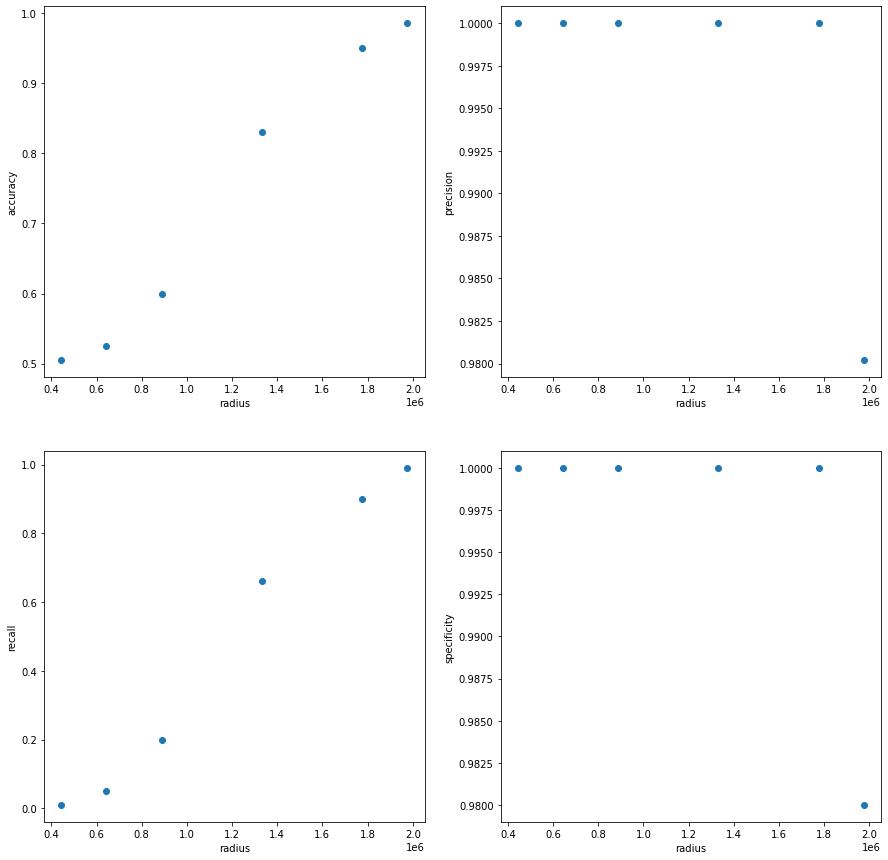

In [18]:
plot_metrics_evolution(metrics_radius_brut_force_list, radius_brut_force, "radius")

In [19]:
metrics_radius_eigen_list = list()
for radius in radius_eigen:
    result_all_probes = authenticator.authenticate_all_probes(authenticator.gallery_eigenface_pictures, authenticator.probes_eigenface_pictures, radius)
    accuracy, precision, recall, specificity = authenticator.compute_metrics(result_all_probes)
    metrics_radius_eigen_list.append((accuracy, precision, recall, specificity))

TP: 13
FP: 0
TN: 100
FN: 87
TP: 29
FP: 0
TN: 100
FN: 71
TP: 71
FP: 0
TN: 100
FN: 29
TP: 87
FP: 0
TN: 100
FN: 13
TP: 94
FP: 1
TN: 99
FN: 6
TP: 97
FP: 30
TN: 70
FN: 3


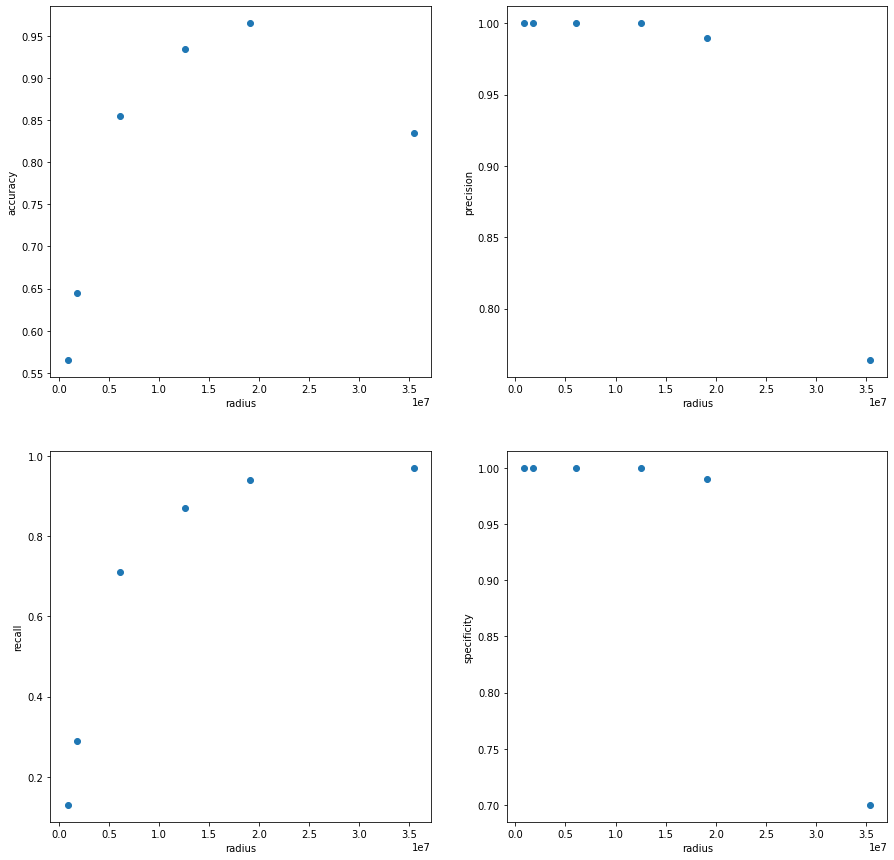

In [20]:
plot_metrics_evolution(metrics_radius_eigen_list, radius_eigen, "radius")

